In [108]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import sinvchi2

## Excersice 2

Comparison of two multinomial observations: on September 25, 1988, the evening of a presidential campaign debate, ABC News conducted a survey of registered voters in the United States; 639 persons were polled before the debate, and 639different persons were polled after. The results are displayed in Table 3.2. Assume the surveys are independent simple random samples from the population of registered voters. Model the data with two different multinomial distributions. For j =1, 2, let αj be the proportion of voters who preferred Bush, out of those who had a preference for either Bush or Dukakis at the time of survey j. Plot a histogram of the posterior density for α2 − α1. What is the posterior probability that there was a shift toward Bush?

In [109]:
pre_debate=[294, 307, 38]
post_debate=[288, 332, 19]
labels=['Bush', 'Dukakis', 'No opinion/other']
df=pd.DataFrame({'pre_debate':pre_debate,
                'post_debate': post_debate})
df=df.T
df.columns=labels
df['sum']=df.sum(axis=1)

In [110]:
df

,Bush,Dukakis,No opinion/other,sum
pre_debate,294,307,38,639
post_debate,288,332,19,639


In [111]:
theta_bush_pre=df.Bush.pre_debate/df['sum'].pre_debate
theta_bush_post=df.Bush.post_debate/df['sum'].post_debate

In [112]:
theta_bush_pre.round(3), theta_bush_post.round(3)

(0.46, 0.451)

Assume independent uniform prior distributions on the multinomial parameters. Then the posterior distributions are independent multinomial: (π1, π2, π3)|y ∼ Dirichlet(295, 308, 39) (π∗ 1, π∗ 2, π∗ 3 )|y ∼ Dirichlet(289, 333, 20),

From the properties of the Dirichlet distribution (see Exercise 3.1), 

α1|y ∼ Beta(295, 308) 

α2|y ∼ Beta(289, 333).

In [113]:
samples_pre_bush=stats.beta(df.Bush.pre_debate+1, df.Dukakis.pre_debate+1).rvs(2000)
samples_post_bush=stats.beta(df.Bush.post_debate+1, df.Dukakis.post_debate+1).rvs(2000)

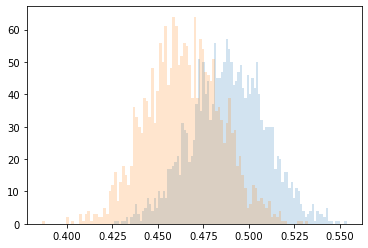

In [114]:
_, bins_pre, dens_pre=plt.hist(samples_pre_bush, bins=100, alpha=0.2)
_, bins_post, dens_post=plt.hist(samples_post_bush, bins=100, alpha=0.2)

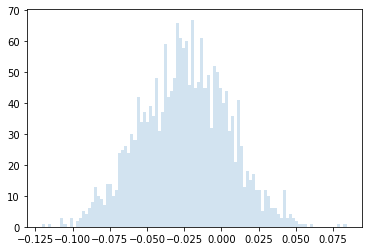

In [115]:
diff=samples_post_bush-samples_pre_bush
_, bins_diff, dens_diff=plt.hist(diff, bins=100, alpha=0.2)

In [116]:
#What is the posterior probability that there was a shift toward Bush?
dens_diff_norm=dens_diff.datavalues/dens_diff.datavalues.sum()
dens_diff_norm[bins_diff[1:]>0].sum()

0.2235

#### If I would not use Dirichlet but lose some information and use beta distribution

In [117]:
samples_pre_bush_beta=stats.beta(df.Bush.pre_debate, df['sum'].pre_debate-df.Bush.pre_debate).rvs(100000)
samples_post_bush_beta=stats.beta(df.Bush.post_debate, df['sum'].post_debate-df.Bush.post_debate).rvs(100000)

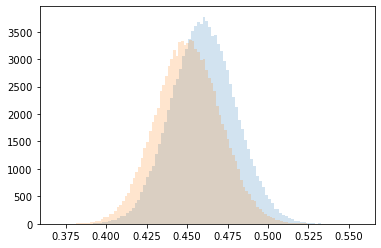

In [118]:
_, bins_pre_beta, dens_pre_beta=plt.hist(samples_pre_bush_beta, bins=100, alpha=0.2)
_, bins_post_beta, dens_post_beta=plt.hist(samples_post_bush_beta, bins=100, alpha=0.2)

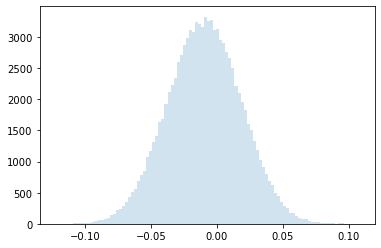

In [119]:
diff_beta=samples_post_bush_beta-samples_pre_bush_beta
_, bins_diff_beta, dens_diff_beta=plt.hist(diff_beta, bins=100, alpha=0.2)

In [120]:
#What is the posterior probability that there was a shift toward Bush?
dens_diff_norm_beta=dens_diff_beta.datavalues/dens_diff_beta.datavalues.sum()
dens_diff_norm_beta[bins_diff_beta[1:]>0].sum() #shows more increase towards Bush, but this is also incorrect solution

0.37486

## Excercise 5

Rounded data: it is a common problem for measurements to be observed in rounded form (for a review, see Heitjan, 1989). For a simple example, suppose we weigh an object five times and measure weights, rounded to the nearest pound, of 10, 10, 12, 11, 9. Assume the unrounded measurements are normally distributed with a noninformative prior distribution on the mean μ and variance σ2. 

(a) Give the posterior distribution for (μ, σ2) obtained by pretending that the observations are exact unrounded measurements. 

(b) Give the correct posterior distribution for (μ, σ2) treating the measurements as rounded. 

(c) How do the incorrect and correct posterior distributions differ? Compare means, variances, and contour plots. 

(d) Let z =(z1,...,z5) be the original, unrounded measurements corresponding to the five observations above. Draw simulations from the posterior distribution of z. Compute the posterior mean of (z1 − z2)2.

#### a) 

If the observations are treated as exact measurements then the theory of Section 3.2 applies. Then p(σ2|y) ∼ Inv-χ2(n − 1, s2) and p(μ|σ2, y) ∼ N ( ̄ y, σ2/n) with n = 5,  ̄ y = 10.4, s2 = 1.3.

In [121]:
data=[10, 10, 12, 11, 9]
n = len(data)
s2 = np.var(data, ddof=1)  # here ddof=1 is used to get the sample estimate
my = np.mean(data)
my, s2

(10.4, 1.3)

In [122]:
nsim=100000
#this is another way to get inv-chi square
sd_a=np.sqrt((n-1)*s2/np.random.chisquare(4, nsim))
mu_a=np.random.normal(my,sd_a/np.sqrt(n),nsim)

In [123]:
np.median(sd_a).round(3)

1.246

In [124]:
np.median(mu_a).round(3)

10.404

In [125]:
#exact calculation for mu, using Aalto version
tl1 = [5, 15]
t1 = np.linspace(tl1[0], tl1[1], 10000)
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)
pm_mu_norm=pm_mu/pm_mu.sum()

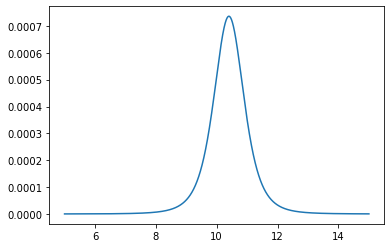

In [126]:
plt.plot(t1, pm_mu_norm)

In [127]:
t1[pm_mu_norm.cumsum()<=0.5][-1].round(3)

10.399

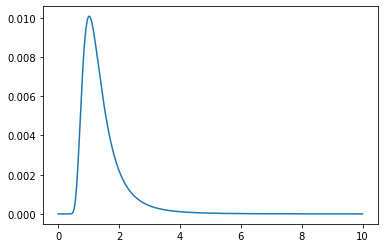

In [128]:
#exact calculation for sigma
tl2 = [0.001, 10]
t2 = np.linspace(tl2[0], tl2[1], 1000)
pm_sigma = sinvchi2.pdf(t2**2, n-1, s2)*2*t2
pm_sigma_norm=pm_sigma/pm_sigma.sum()
plt.plot(t2, pm_sigma_norm)

In [129]:
t2[pm_sigma_norm.cumsum()<=0.5][-1].round(3)

1.232

#### b) and c)

In [130]:
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=pd.DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T.round(3)
    return summ

In [131]:
#ignoring rounding, keeping data as exact measurements. Median or mean and sd are close ase previous 
sd_a=np.sqrt((n-1)*s2/np.random.chisquare(4,nsim))
mu_a=np.random.normal(my,sd_a/np.sqrt(n),nsim)
print(summ(mu_a)) 

      mean     sd   2.5%     25%     50%     75%   97.5%
info  10.4  0.721  8.985  10.022  10.398  10.777  11.818


In [132]:
print(summ(sd_a))

       mean     sd   2.5%    25%    50%    75%  97.5%
info  1.429  0.763  0.682  0.983  1.244  1.643  3.268


In [133]:
#to regard rounding we'll do some grid sampling
mugrid=np.linspace(3,18,200)
logsgrid=np.linspace(-2,4,200)
contours_1=np.arange(0.05,1.0,0.05)
contours_1=contours_1.tolist()
contours=[0.0001,0.001,0.01]
contours.extend(contours_1)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_22288\2684179799.py:2: RuntimeWarning: divide by zero encountered in log
  ldens=np.sum(np.log(stats.norm.pdf(y, loc=mu, scale=sd)))


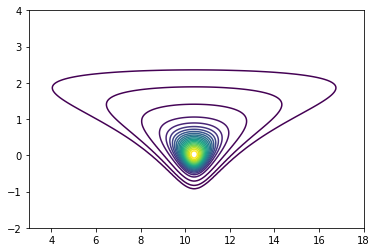

In [134]:
def post_a(mu, sd, y):
    ldens=np.sum(np.log(stats.norm.pdf(y, loc=mu, scale=sd)))
    return ldens

logdens_a=[]
for i in range(len(mugrid)):
    logdens_1=[]
    for j in range(len(logsgrid)):
        logdens_1.append(post_a(mugrid[i], np.power(np.e, logsgrid[j]), data))
    logdens_a.append(logdens_1)
                
dens_a=np.exp(logdens_a-np.max(logdens_a))
plt.contour(mugrid, logsgrid, pd.DataFrame(dens_a).T, contours)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_22288\853771004.py:4: RuntimeWarning: divide by zero encountered in log
  ldens=np.sum(np.log(stats.norm.cdf(y_plus_0_5,loc=mu, scale=sd)-stats.norm.cdf(y_minus_0_5, loc=mu, scale=sd)))


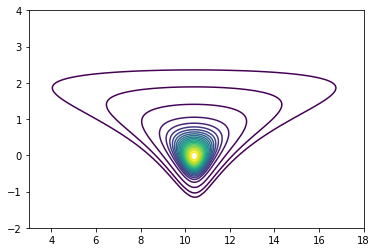

In [135]:
def post_b(mu, sd, y):
    y_plus_0_5=np.array(y)+0.5
    y_minus_0_5=np.array(y)-0.5
    ldens=np.sum(np.log(stats.norm.cdf(y_plus_0_5,loc=mu, scale=sd)-stats.norm.cdf(y_minus_0_5, loc=mu, scale=sd)))
    return ldens

logdens_b=[]
for i in range(len(mugrid)):
    logdens_1=[]
    for j in range(len(logsgrid)):
        logdens_1.append(post_b(mugrid[i], np.power(np.e, logsgrid[j]), data))
    logdens_b.append(logdens_1)
                
dens_b=np.exp(logdens_b-np.max(logdens_b))
plt.contour(mugrid, logsgrid, pd.DataFrame(dens_b).T, contours)

In [136]:
sd_b_dens=pd.DataFrame(dens_b)
mu_b_dens=pd.DataFrame(dens_b).T

sd_b=np.exp(np.random.choice(np.array(logsgrid),p=np.array(np.sum(sd_b_dens))/np.sum(np.sum(sd_b_dens)),size=nsim))
mu_b=np.random.choice(np.array(mugrid),p=np.array(np.sum(mu_b_dens))/np.sum(np.sum(mu_b_dens)),size=nsim)
#and final solution to gridsampling
print(summ(mu_b))  

        mean     sd  2.5%    25%     50%     75%   97.5%
info  10.402  0.696  9.03  10.01  10.387  10.764  11.819


In [137]:
#and final solution exact disregarding rounding
print(summ(mu_a)) 

      mean     sd   2.5%     25%     50%     75%   97.5%
info  10.4  0.721  8.985  10.022  10.398  10.777  11.818


In [138]:
#gridsampling
print(summ(sd_b))

      mean     sd   2.5%    25%    50%    75%  97.5%
info  1.37  0.733  0.611  0.932  1.186  1.604  3.209


In [139]:
#and final solution exact disregarding rounding
print(summ(sd_a))

       mean     sd   2.5%    25%    50%    75%  97.5%
info  1.429  0.763  0.682  0.983  1.244  1.643  3.268


#### d)

In [140]:
z=pd.DataFrame(np.ones([nsim, len(data)]))
for i in range(len(data)):
    lower=stats.norm.cdf(data[i]-0.5, mu_a, sd_a)
    upper=stats.norm.cdf(data[i]+0.5, mu_a, sd_a)
    z.iloc[:,i]=stats.norm.isf(lower+np.random.uniform(size=nsim)*(upper-lower), mu_a, sd_a)
print(np.round(np.mean((z.iloc[:,1]-z.iloc[:,0])**2), 3))

0.161


In [141]:
z.head()

,0,1,2,3,4
0,10.570629,10.697264,9.124737,9.854338,11.732281
1,12.589080,12.461870,9.656742,11.512618,12.811464
2,10.559871,10.596340,8.272045,9.548933,11.423948
3,9.951138,10.431857,8.778781,9.445837,11.499463
4,11.791551,11.493454,9.832831,11.247038,12.728054
